<a href="https://colab.research.google.com/github/yilewang/TVB_Demo/blob/master/tvb_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

%pip install tvb-library
%pylab inline
import os
from tvb.simulator.lab import *
LOG = get_logger('demo')
import pickle as cPickle
from tvb.simulator.models.stefanescu_jirsa import ReducedSetHindmarshRose


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/tvb/datatypes/surfaces.py:63: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


In [2]:
! wget -c -O 0306A.zip --no-check-certificate https://github.com/yilewang/TVB_Demo/raw/master/0306A.zip
path = os.path.abspath("0306A.zip")
print(path)

--2021-10-18 15:58:39--  https://github.com/yilewang/TVB_Demo/raw/master/0306A.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yilewang/TVB_Demo/master/0306A.zip [following]
--2021-10-18 15:58:39--  https://raw.githubusercontent.com/yilewang/TVB_Demo/master/0306A.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1688 (1.6K) [application/zip]
Saving to: ‘0306A.zip’

0306A.zip           100%[===================>]   1.65K  --.-KB/s    in 0s      

2021-10-18 15:58:40 (26.2 MB/s) - ‘0306A.zip’ saved [1688/1688]

/content/0306A.zip


In [9]:
sim = simulator.Simulator(
    model=ReducedSetHindmarshRose(), 
    connectivity=connectivity.Connectivity.from_file(path),                      
    coupling=coupling.Linear(a=np.array([0.015])),
    simulation_length=1e3,
    integrator=integrators.HeunStochastic(dt=0.01220703125, noise=noise.Additive(nsig=np.array([0.00001]), ntau=0.0,
                                                                                random_stream=np.random.RandomState(seed=42))),
    monitors=(
       monitors.TemporalAverage(period=1.),
       monitors.Raw(),
       monitors.ProgressLogger(period=1e2)
    )
).configure()
sim.configure()

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


,value
Type,Simulator
conduction_speed,3.0
connectivity,Connectivity gid: 807e2ba9-07cc-4e7f-b141-95d08ed0cdb8
coupling,Linear gid: 1589e97d-78a2-4fc7-bb9c-c9a2462911be
gid,UUID('7fdd8328-6f11-488a-8cd2-003cb1fc40c8')
initial_conditions,None
integrator,HeunStochastic gid: 87eac3a9-174e-4164-9c29-9d7dd3ba01cf
model,ReducedSetHindmarshRose gid: de5106e6-4487-42e4-9bd6-100f8177ca2c
monitors,"(, , )"
simulation_length,1000.0


In [4]:
(tavg_time, tavg_data), (raw_time, raw_data),_ = sim.run()

   INFO  step 1 time 0.0000 s
   INFO  step 8193 time 0.1000 s
   INFO  step 16385 time 0.2000 s
   INFO  step 24577 time 0.3000 s
   INFO  step 32769 time 0.4000 s
   INFO  step 40961 time 0.5000 s
   INFO  step 49153 time 0.6000 s
   INFO  step 57345 time 0.7000 s
   INFO  step 65537 time 0.8000 s
   INFO  step 73729 time 0.9000 s


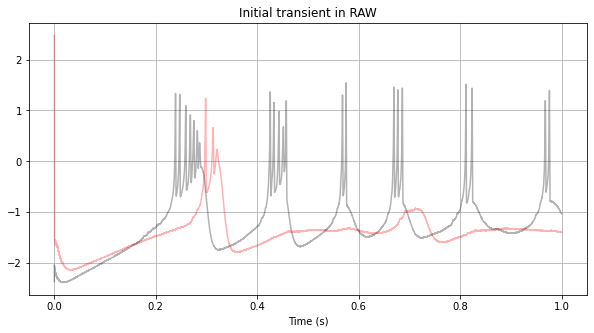

In [5]:


figure(figsize=(10, 5))
plot(raw_time * 1e-3, raw_data[:, 0, 4, 0], "r", alpha=0.3)
plot(raw_time * 1e-3, raw_data[:, 0, 5, 0], "k", alpha=0.3)
title('Initial transient in RAW')
xlabel('Time (s)')
grid(True);



In [6]:

speed=10.
oscillator = models.ReducedSetHindmarshRose()
white_matter = connectivity.Connectivity.from_file(path)
# oscilator.variables_of_interest = ["xi"]
white_matter.speed = np.array([speed])
white_matter_coupling = coupling.Linear(a=np.array([0.015]))
heunint = integrators.HeunStochastic(dt=0.01220703125, noise=noise.Additive(nsig=np.array([0.00001]), ntau=0.0, random_stream=np.random.RandomState(seed=42)))
# Initialise some Monitors with period in physical time
mon_raw = monitors.Raw()
mon_tavg = monitors.TemporalAverage(period=1.)
what_to_watch = (mon_tavg, mon_raw)
# Initialise a Simulator -- Model, Connectivity, Integrator, and Monitors.
sim = simulator.Simulator(model=oscillator, connectivity=white_matter,
                        coupling=white_matter_coupling,
                        integrator=heunint, monitors=what_to_watch, simulation_length=1e3)
sim.configure()

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


,value
Type,Simulator
conduction_speed,3.0
connectivity,Connectivity gid: 561fc435-bb11-4aef-a20d-7b82434ef4fe
coupling,Linear gid: 693dfabe-7a06-4016-ba9c-407074a77e37
gid,UUID('7042cce1-136b-44cf-9f6b-1b866d12ff20')
initial_conditions,None
integrator,HeunStochastic gid: dd53cf96-bbb0-4542-b1b2-68817675b4c2
model,ReducedSetHindmarshRose gid: c5482fb2-f332-4d51-bc71-0033383b4b92
monitors,"(, )"
simulation_length,1000.0


In [7]:
(tavg_time, tavg_data), (raw_time, raw_data) = sim.run()

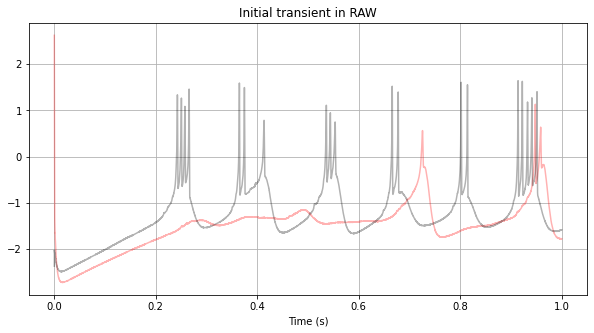

In [8]:

figure(figsize=(10, 5))
plt.plot(raw_time * 1e-3, raw_data[:, 0, 4, 0], "r", alpha=0.3)
plt.plot(raw_time * 1e-3, raw_data[:, 0, 5, 0], "k", alpha=0.3)
plt.title('Initial transient in RAW')
plt.xlabel('Time (s)')
plt.grid(True)
plt.show()